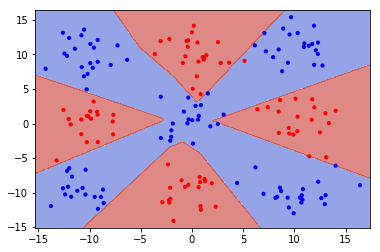

array([-1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int16)

In [8]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt


Dataset = sio.loadmat('HW9_ex5.mat')

train_x = Dataset['train_X']
train_y = Dataset['train_y']
test_x = Dataset['test_X']
test_y = Dataset['test_y']

from sklearn import svm
from sklearn.neural_network import MLPClassifier

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

clf = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(10,), random_state=1)
clf.fit(train_x, train_y.reshape(180))


X00, X11 = train_x[:,0], train_x[:,1]
xx, yy = make_meshgrid(X00, X11)
fig, ax= plt.subplots(1, 1)
color= ['red' if l == 1 else 'blue' for l in train_y.reshape(180)]
plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.6)
ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
plt.show()

clf.predict(test_x)

We will calculate the accuracy_score of the Neural Network classifier for different node numbers in the single hidden layer.

For  3  nodes in the single hidden layer:
Accuracy:  0.766666666667
Countours:


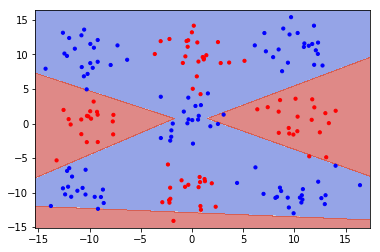

For  4  nodes in the single hidden layer:
Accuracy:  0.861111111111
Countours:


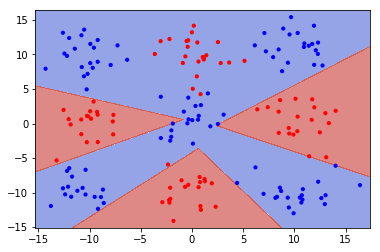

For  10  nodes in the single hidden layer:
Accuracy:  0.944444444444
Countours:


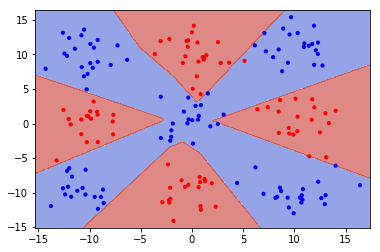

For  50  nodes in the single hidden layer:
Accuracy:  0.972222222222
Countours:


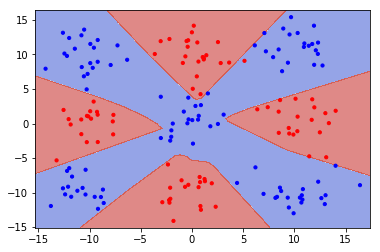

In [26]:
for n_nodes in [3,4,10,50]:
    print('For ', n_nodes,' nodes in the single hidden layer:')
    clf = MLPClassifier(solver='lbfgs', alpha=1e-3,hidden_layer_sizes=(n_nodes,), random_state=1)
    clf.fit(train_x, train_y.reshape(180))
    preds = clf.predict(test_x)
    
    Accuracy = 1 - (np.sum(i==1 for i in preds != test_y.reshape(180)) / len(preds))
    print('Accuracy: ', Accuracy)
    
    print('Countours:')
    X00, X11 = train_x[:,0], train_x[:,1]
    xx, yy = make_meshgrid(X00, X11)
    fig, ax= plt.subplots(1, 1)
    color= ['red' if l == 1 else 'blue' for l in train_y.reshape(180)]
    plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.6)
    ax.scatter(X00, X11,c=color, cmap=plt.cm.coolwarm, s=10, edgecolors='face')
    plt.show()    

We observe that the NN model with 1 hidden layer and 50 nodes is the best classifier in our case.
More specifically, it has 97.22 % Accuracy score